# Повторение основ :)

# Линейная регрессия

Обозначения:
- $\mathbb{X} \in \mathbb{R}^{n \times m}$ - матрица признаков
- $\mathbb{Y} \in \mathbb{R}^n$ - целевая переменная
- $x \in \mathbb{R}^{m}$ - один объект из выборки
- $\omega = (\omega_1,...,\omega_m)$ - вектор весов (параметров) модели
- $Q(f, \mathbb{Y})$ - функционал ошибок

Общий вид модели: $f(x, \omega) = \omega_0 + x_1\omega_1 + ... + x_m\omega_m = \sum\limits_{i=0}^{m}x_i\omega_i = <x, \omega>$

**Пример**
![lin_reg](./example_lin_reg.png)
<p style="text-align: center;"></p>

**Как делали до этого?**

import sklearn

model = sklearn.LinReg(params) \
model.fit(X_train, y_train) \
model.predict(X_test) 

___Готово!___

Давайте разберёмся, как это работает под капотом

# Немного теории оптимизаций

Пусть $f$ - векторная функция.

$\nabla f = \big(\dfrac{\partial f}{\partial x_1},...,\dfrac{\partial f}{\partial x_n} \big)$.\
Градиент показывает направление __наискорейшего роста__ функции.\
В задачах машинного обучения мы хотим минимизировать некоторый функционал ошибок. Поможет ли в этом градиент?

___Ваш ответ:___ $-\nabla f$

![rm](./rik_and_morti.jpeg)
<p style="text-align: center;"></p>

# Классический градиентный спуск

$-\nabla_{\omega}Q$ - вектор, направленный в сторону наискорешего убывания.

Тогда можем задать рекуррентную формулу:

$\omega^{(k)} = \omega^{(k - 1)} - \eta \nabla_{\omega}Q(\omega^{(k-1)})$

Где $\eta$ - шаг нашего спуска.

В двухмерном виде выглядит так:

![grad](./grad.png)
<p style="text-align: center;"></p>

Открытые вопросы: 
- Как задавать $\omega^{(0)}$?
- Когда останавливаться?

___Ваша заметка:___

$\omega^{(0)}$ - рандомим

Останавливаемся: задаем количество шагов спуска

# Stochastic Gradient Descent 

$Q(f, \mathbb{Y}) = \dfrac{1}{n}\sum\limits_{i=1}^{n}q_i(x_i, \omega, y_i)$

$\nabla_{\omega}Q = \dfrac{1}{n}\sum\limits_{i=1}^{n}\nabla_{\omega}q_i$

Вычисляем градиенты n раз!

$\nabla_{\omega}Q \approx \nabla_{\omega}q_i$

Тогда:

$\omega^{(k)} = \omega^{(k-1)} - \eta_k \nabla_{\omega}q_{i_k}(\omega^{(k-1)})$, где $i_k$ - номер случайного элемента из выборки на $k$-ом шаге

___Теорема___:
Сходимость SGD гарантируется, если выполнены условия:
- $\sum\limits_{k=1}^{\infty}\eta_k$ - расходится
- $\sum\limits_{k=1}^{\infty}\eta_k^2$ - сходится

Например, можно брать последовательность $\eta_k = \dfrac{1}{k}$

# Пишем свою модель

Будем собирать нашу модель по кусочкам. Напишем и потестируем градиентный спуск.

Функионал ошибок: $Q = MSE = \sum\limits_{i}(y_i-x_i^T \omega)^2 = ||\mathbb{Y} - \mathbb{X}\omega||_2^2$

$\omega_{opt} = (\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}\mathbb{Y}$

Найдём шаг градиентного спуска

$||\mathbb{Y} - \mathbb{X}\omega||_2^2 = <\mathbb{Y} - \mathbb{X}\omega, \mathbb{Y} - \mathbb{X}\omega>$

Дифференциал для векторной функции: $df(x)\big|_{x_0} = <\nabla f(x), x_0>$

Формула дифференциала скалярного произведения: $d(<u, v>)\big|_{\omega} = <d(u)|_{\omega}, v> + <u, d(v)|_{\omega}>$

$dQ\big|_{\omega_{*}} = 2<d(\mathbb{Y} - \mathbb{X}\omega)\big|_{\omega_{*}}, \mathbb{Y} - \mathbb{X}\omega>$

$dQ\big|_{\omega_{*}} = -2<\mathbb{Y} - \mathbb{X}\omega, \mathbb{X}\omega_{*}> = -2\mathbb{X}^T<\mathbb{Y} - \mathbb{X}\omega, \omega_{*}>$

$\nabla_{\omega}Q = -2\mathbb{X}^T(\mathbb{Y} - \mathbb{X}\omega) = 2\mathbb{X}^T(\mathbb{X}\omega - \mathbb{Y})$

In [92]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [93]:
random_seed = 43
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 50
np.random.seed(random_seed)

# Генерим истинные веса
w_true = np.random.normal(size=(n_features, ))
print("Vector of true parameters: ", w_true)

# Под веса создаем признаки
X = np.random.uniform(-5, 5, (n_objects, n_features))

# Scale vector of features
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] 

# Создаем таргет
# add normal noise
Y = X.dot(w_true) + np.random.normal(0, 1, n_objects)

Vector of true parameters:  [ 0.25739993 -0.90848143]


In [94]:
# Пишем градиентный спуск

w_0 = np.random.uniform(-2, 2, n_features)-0.5
w = w_0.copy()
w_list = [w.copy()]
learning_rate = 1e-2

for i in range(num_steps):
    w -= 2 * learning_rate * np.dot(X.T, np.dot(X, w) - Y) / Y.size
    w_list.append(w.copy())
    
w_list = np.array(w_list)
print("Vector of optimizaed parameter with GD", w_list[-1])

Vector of optimizaed parameter with GD [ 0.22941531 -0.8990165 ]


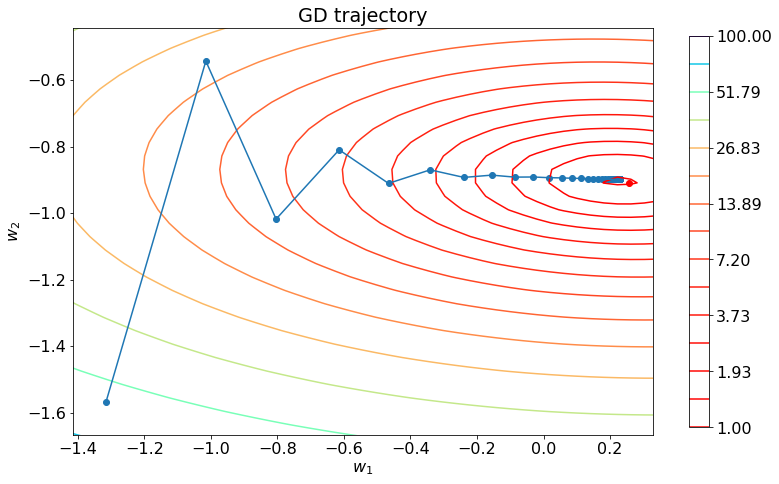

In [95]:
matplotlib.rcParams.update({'font.size': 16})

# Визуализируем градиентный спуск
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
plt.gca().set_aspect('equal')

CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=15), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

# Напишем SGD

In [96]:
np.random.seed(random_seed)
w = w_0.copy()
w_list = [w.copy()]
lr_0 = 0.02
batch_size = 10

for i in range(num_steps):
    lr = lr_0 / (i+1)
    # randomly draw batch_size samples from all the samples
    sample_indices = np.random.randint(n_objects, size=batch_size)
    w -= 2 * lr * np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) / batch_size
    w_list.append(w.copy())
w_list = np.array(w_list)
print("Vector of optimizaed parameter with GD", w_list[-1])

Vector of optimizaed parameter with GD [-0.19577732 -0.88379106]


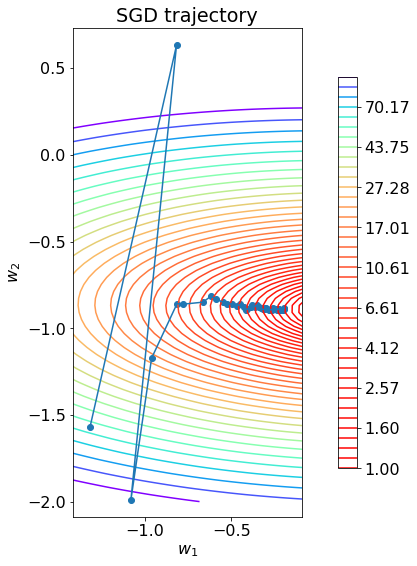

In [97]:
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=40), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

# Реализуем полностью нашу собственную модель линейной регрессии

In [98]:
from sklearn.base import BaseEstimator, RegressorMixin

class LinReg(BaseEstimator, RegressorMixin):
    
    def __init__(self, batch_size=25, num_steps=350, lr=1e-2):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        for i in range(self.num_steps):
            sample_indices = np.random.randint(0, n_objects, size=batch_size)
            w -= 2 * self.lr * np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) / self.batch_size

        self.w = w
        return self

    def predict(self, X):
        return X@self.w

# Реализуем свою модель линейной регрессии с регуляризацией

$Q = \sum\limits_{i}(y_i-x_i^T \omega)^2  + \lambda \sum\limits_{k} \omega_k^2 = ||\mathbb{Y} - \mathbb{X}\omega||_2^2 + \lambda ||\omega||_2^2$

$\nabla_{\omega}Q = -2\mathbb{X}^T(\mathbb{Y} - \mathbb{X}\omega) + 2\lambda \omega = 2\mathbb{X}^T(\mathbb{X}\omega - \mathbb{Y}) + 2\lambda \omega$

In [99]:
np.random.seed(random_seed)
w = w_0.copy()
w_list = [w.copy()]
learning_rate = 1e-2
lamda = 1e-1

for i in range(num_steps):
    w -= 2 * learning_rate * (np.dot(X.T, np.dot(X, w) - Y) + lamda*w)/ Y.size
    w_list.append(w.copy())
    
w_list = np.array(w_list)
print("Vector of optimizaed parameter with Ridge GD", w_list[-1])

Vector of optimizaed parameter with Ridge GD [ 0.22940599 -0.89901216]


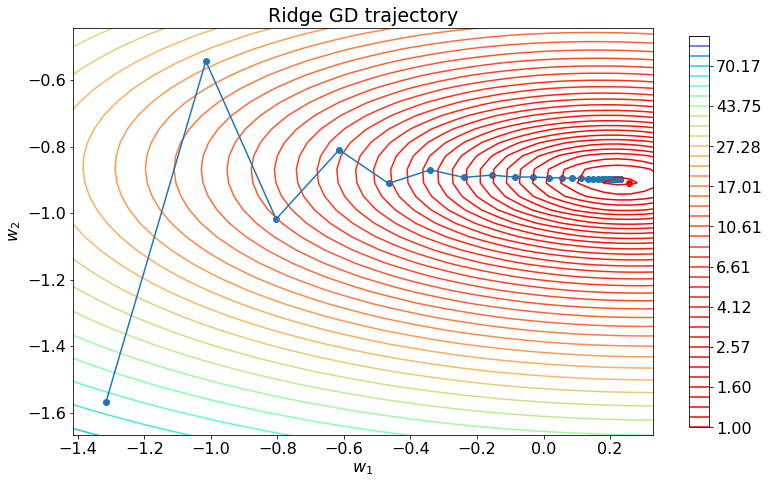

In [100]:
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('Ridge GD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=40), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

In [101]:
class LinRidgeReg(BaseEstimator, RegressorMixin):
    
    def __init__(self, batch_size=25, num_steps=350, lr=1e-2, lamda=1):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr
        self.lamda = lamda

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        for i in range(self.num_steps):
            sample_indices = np.random.randint(0, n_objects, size=batch_size)
            w -= 2 * self.lr * (np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) 
                                + self.lamda*w)/ self.batch_size

        self.w = w
        return self

    def predict(self, X):
        return X @ self.w

___Задание___: 
- Реализовать свою модель линейной регрессии с регуляризацией и сравнить с моделью Ridge

# Сравним с моделью из коробки

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#Генерация данных для тестирования
n_features = 700
n_objects = 100000

w_true = np.random.uniform(-2, 2, (n_features, 1))

X = np.random.uniform(-100, 100, (n_objects, n_features)) * np.arange(n_features)
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [104]:
"""
StandardScaler -- Standardize features by removing the mean and scaling to unit variance.
z = (x - u) / s, u -- mean, s -- std
"""

scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(x_train)
# Perform standardization by centering and scaling of the train and test sets
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Сравним модели по $R^2 score$.

<$R^2 = 1 - \dfrac{\sum\limits_{i}(y_i - f(x_i, \omega))^2}{\sum\limits_{i}(y_i - y_{mean})^2}$

$R^2 score$ показывает насколько наша модель хорошо описывает данные

In [105]:
own_model = LinReg().fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_r2 = r2_score(y_test, y_pred)

sklearn_model = LinearRegression().fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)

sklearn_r2 = r2_score(y_test, y_pred)

print('R^2 in own model:', own_r2)
print('R^2 in sklearn loss:', sklearn_r2)

R^2 in own model: 0.9799735472511857
R^2 in sklearn loss: 0.9999999997894883


Сраниваем свою модель с регуляризацией с sklearn

Для наглядности модиифицируем данные так, чтобы матрица $(\mathbb X^T \mathbb X)$ была сингулярной и увеличим число итераций
оптимизатора, чтобы увидеть overfitting

In [106]:
# модификация данных
cols2rep = np.random.randint(0, n_features, size=10)
n_features += len(cols2rep)
X = np.hstack((X, X[:,cols2rep]))
w_true = np.vstack((w_true, w_true[cols2rep]))
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))

# разделение на train и test 
x_train, x_test, y_train, y_test = train_test_split(X, Y)

# нормализация
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [107]:
n_steps = 600
own_lin_model = LinReg(num_steps=n_steps).fit(x_scaled, y_train)
y_pred_lin = own_lin_model.predict(x_test_scaled)
own_lin_r2 = r2_score(y_test, y_pred_lin)

own_ridge_model = LinRidgeReg(lamda=3e-3, num_steps=n_steps).fit(x_scaled, y_train)
y_pred_ridge = own_ridge_model.predict(x_test_scaled)
own_ridge_r2 = r2_score(y_test, y_pred_ridge)

sklearn_ridge_model = Ridge().fit(x_scaled, y_train)
y_pred_sklearn = sklearn_ridge_model.predict(x_test_scaled)
sklearn_ridge_rw = r2_score(y_test, y_pred_sklearn)

print('R^2 in own lin model:', own_lin_r2)
print('R^2 in own ridge model:', own_ridge_r2)
print('R^2 in sklearn loss:', sklearn_ridge_rw)

R^2 in own lin model: 0.9989910251271993
R^2 in own ridge model: 0.9990885914602341
R^2 in sklearn loss: 0.9999999996053301


# Линейная классификация

Рассмотрим задачу бинарной классификации, пусть целевая переменная $y_i \in \{+1, -1\}$

В задачах линейной классификации мы исходим из предположения о линейной разделимости выборки:

![lin_class](./lin_sample.jpeg)
<p style="text-align: center;"></p>

Исходя из этого, наша модель имеет вид:

___Ваш ответ___: sign(<x, w>)

# Обучение линейного классификатора

Введём функционал ошибок: $Q = \dfrac{1}{n}\sum\limits_{i=1}^{n}[f(x_i, \omega) \neq y_i]$ - плохо

$Q = \dfrac{1}{n}\sum\limits_{i=1}^{n}[f(x_i, \omega) \neq y_i] < \dfrac{1}{n}\sum\limits_{i=1}^{n}L(x_i, \omega, y_i)$

# Логистическая регрессия

Хотим предсказывать не класс нашего объекта, а вероятность, что он принадлежит к классу +1, то есть $f(x_i) = \mathbb{P}(y_i = +1 | x_i)$

Зададим функцию правдоподобия:

$\mathcal{L} = \prod\limits_{i=1}^{n}f(x_i)^{[y_i=+1]}(1-f(x_i))^{[y_i = -1]}$

$-log\mathcal{L} = -\sum\limits_{i=1}^{n}\big(  [y_i=+1]logf(x) + [y_i=-1]log(1 - f(x)) \big)$

$L = [y_i=+1]logf(x) + [y_i=-1]log(1 - f(x))$

$\sigma(x) = \dfrac{1}{1 + e^{-x}}$

![sigmoid](./sigmoid.png)
<p style="text-align: center;"></p>

Если в качестве $f(x)$ взять $f(x) = \sigma(<x, \omega>)$, то $log-loss = \dfrac{1}{n}\sum\limits_{i=1}^{n}log(1 + e^{y_i<x_i, \omega>})$ 

___Задание___: написать свою логистическую регрессию

In [108]:
from numpy.random import default_rng
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

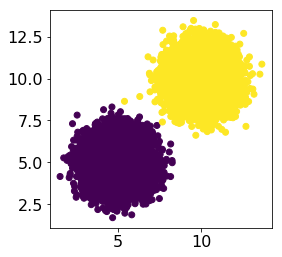

In [109]:
# генерируем данные
rng = default_rng()

N_POINTS = 10000
SCALE = 0.9

train_data = np.c_[
    np.r_[rng.normal(5, SCALE, (N_POINTS, 2)), rng.normal(10, SCALE, (N_POINTS, 2))],
    np.r_[np.zeros((N_POINTS, 1)), np.ones((N_POINTS, 1))],
]

X = train_data[:,:2]
Y = train_data[:,2]

# визуализируй данные
_, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_data[:, 2])
ax.set_aspect(1)
plt.show()

$\nabla_\omega Q = \mathbb{X}^T (f(x, \omega) - \mathbb{Y})$

In [110]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [111]:
# Helper functions
def sigmoid(x, w):
    return 1./(1. + np.exp(-x @ w))

def log_loss(x,y,w):
    return -y.T @ np.log(sigmoid(x,w)) - (1-y).T @ np.log(1-sigmoid(x,w))

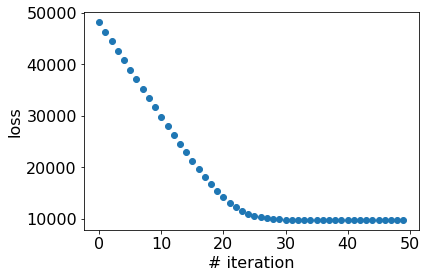

In [112]:
# implementing logistic regression for the whole dataset
n_features = 2
w_0 = np.random.uniform(-2,2,n_features)
w = w_0.copy()
w_list = [w.copy()]
loss = []

n_steps = 50
step_size = 1e-2
for k in range(50):
    w -= step_size*(x_train.T @ (sigmoid(x_train,w) - y_train))/y_train.size
    loss.append(log_loss(x_train, y_train, w))
    w_list.append(w.copy())

# plot loss function to see if algorithm converges
_, ax = plt.subplots()
ax.scatter(np.arange(len(loss)), loss)
ax.set_xlabel("# iteration")
ax.set_ylabel("loss")
plt.show()


In [113]:
class LogReg(BaseEstimator, RegressorMixin):
    
    def __init__(self, batch_size=25, n_steps=500, lr=2e-2, lamda=1, threshold=0.5):
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.lr = lr
        self.lamda = lamda
        self.threshold = threshold
        self.loss = []

    def fit(self, X, Y):
        # convert output into a vector (2D array)
        if Y.ndim == 1:
            Y = Y.reshape(-1,1)
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        for i in range(self.n_steps):
            self.loss.append(log_loss(X, Y, w))
            sample_indices = np.random.randint(0, n_objects, size=batch_size)
            w -= self.lr * (X[sample_indices].T @ (sigmoid(X[sample_indices], w) - Y[sample_indices])
                                + self.lamda*w)/ self.batch_size

        self.w = w
        return self

    def plot_loss(self):
        _, ax = plt.subplots()
        ax.scatter(np.arange(len(self.loss)), self.loss, s=5)
        ax.set_xlabel("# iteration")
        ax.set_ylabel("loss")
        plt.show()

    def predict(self, X):
        probs = sigmoid(X, self.w)
        probs[probs >= self.threshold] = 1.
        probs[probs < self.threshold] = 0. 
        return probs

In [114]:
# Normalize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [115]:
my_model = LogReg(lamda=1e-2).fit(x_train_scaled, y_train)
sklearn_model = LogisticRegression().fit(x_train_scaled, y_train)

my_pred = my_model.predict(x_test_scaled)
sklearn_pred = sklearn_model.predict(x_test_scaled)

my_as = accuracy_score(y_test, my_pred)
sklearn_as = accuracy_score(y_test, sklearn_pred)
print(f"Accuracy score sklearn: {sklearn_as}")
print(f"Accuracy score my model: {my_as}")

Accuracy score sklearn: 0.9998
Accuracy score my model: 0.9962


# Проверим написанный алгоритм на датасете по раку груди

In [116]:
from sklearn.datasets import load_breast_cancer

In [117]:
# Load data and split into train and test datasets
data = load_breast_cancer()
X_bc = data['data']
Y_bc = data['target']

X_bc_train, X_bc_test, Y_bc_train, Y_bc_test = train_test_split(X_bc, Y_bc)

In [118]:
# Normalize data
scaler_bc = StandardScaler()
scaler_bc.fit(X_bc_train)
X_bc_train_scaled = scaler_bc.transform(X_bc_train)
X_bc_test_scaled = scaler_bc.transform(X_bc_test)

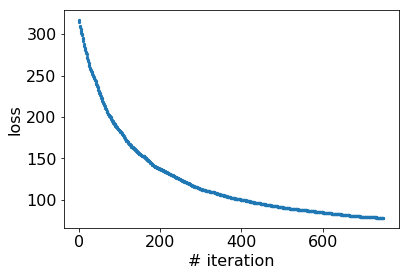

Accuracy score of my model for breast cancer dataset: 0.9440559440559441
Accuracy score of sklearn model for breast cancer dataset: 0.972027972027972


In [122]:
# Train my and sklearn logistic regression models
my_bc_model = LogReg(n_steps=750).fit(X_bc_train_scaled, Y_bc_train)
sklearn_bc_model = LogisticRegression().fit(X_bc_train_scaled, Y_bc_train)

my_bc_model.plot_loss()

# Predict
my_bc_pred = my_bc_model.predict(X_bc_test_scaled)
sklearn_bc_pred = sklearn_bc_model.predict(X_bc_test_scaled)

# Compute accuracy score
my_bc_as = accuracy_score(Y_bc_test, my_bc_pred)
sklearn_bc_as = accuracy_score(Y_bc_test, sklearn_bc_pred)

print(f"Accuracy score of my model for breast cancer dataset: {my_bc_as}")
print(f"Accuracy score of sklearn model for breast cancer dataset: {sklearn_bc_as}")
